In [1]:
import numpy as nm  
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
data= pd.read_csv('M:\\New folder\\ML\\LoanApprovalPrediction.csv')  

In [6]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)

In [8]:
data['Dependents'].fillna(data['Dependents'].mean(), inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_2840\2155580468.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Dependents'].fillna(data['Dependents'].mean(), inplace=True)
C:\Users\mohit\AppData\Local\Temp\ipykernel_2840\2155580468.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [9]:
categorical_cols = data.select_dtypes(include=['object']).columns

In [10]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

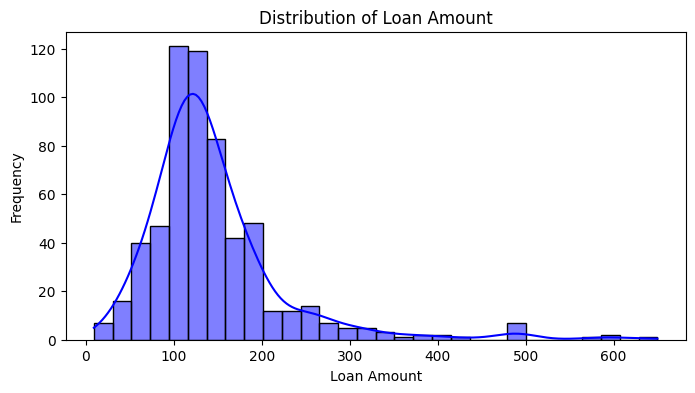

In [11]:
# 1. Distribution of Loan Amount
plt.figure(figsize=(8, 4))
sns.histplot(data['LoanAmount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_2840\2019742579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=data, palette='Set2')


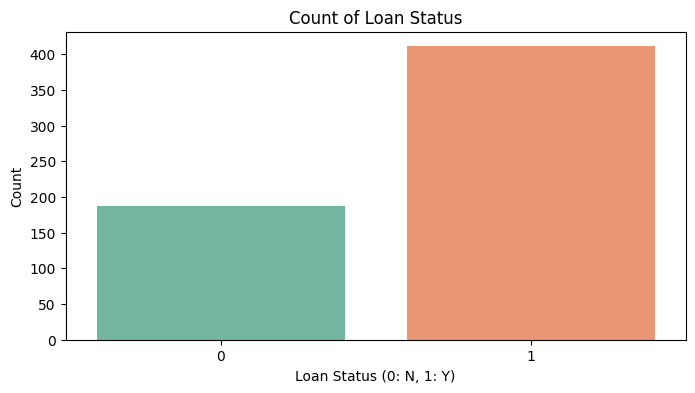

In [12]:
# 2. Countplot of Loan Status
plt.figure(figsize=(8, 4))
sns.countplot(x='Loan_Status', data=data, palette='Set2')
plt.title('Count of Loan Status')
plt.xlabel('Loan Status (0: N, 1: Y)')
plt.ylabel('Count')
plt.show()

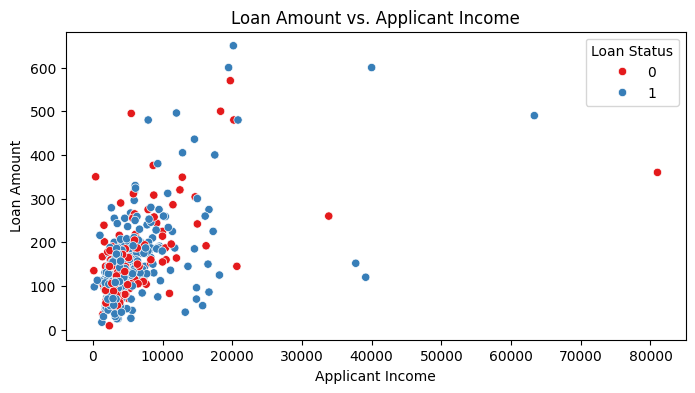

In [13]:
# 3. Loan Amount vs. Applicant Income
plt.figure(figsize=(8, 4))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=data, palette='Set1')
plt.title('Loan Amount vs. Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

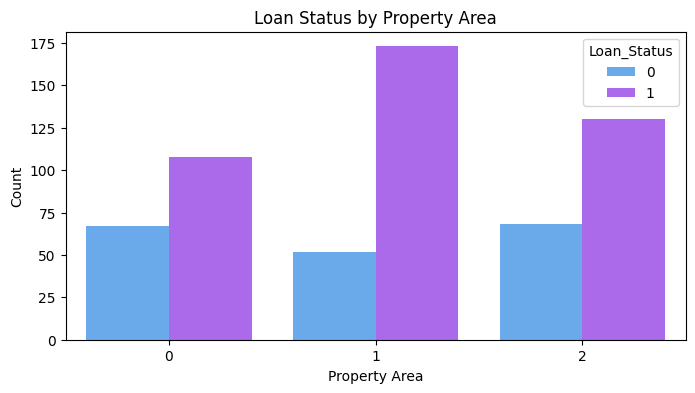

In [14]:
# 4. Loan Status by Property Area
plt.figure(figsize=(8, 4))
sns.countplot(x='Property_Area', hue='Loan_Status', data=data, palette='cool')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

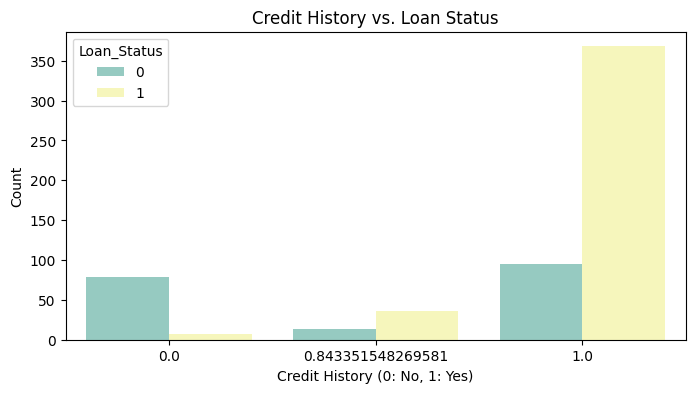

In [15]:
# 5. Credit History vs. Loan Status
plt.figure(figsize=(8, 4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=data, palette='Set3')
plt.title('Credit History vs. Loan Status')
plt.xlabel('Credit History (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [16]:
x=data.iloc[:,:-1]
y=data['Loan_Status']

In [17]:
st=StandardScaler()
x=st.fit_transform(x)

Model 1(with 80% training data and 20% testing data)

In [18]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)  

In [19]:
classifier1= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier1.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred= classifier1.predict(x_test)

In [21]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[16, 10],
       [19, 75]], dtype=int64)

In [22]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.7583333333333333

Model 2(with 70% training data and 30% testing data)

In [23]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=42)

In [24]:
classifier2= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier2.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred= classifier2.predict(x_test)

In [26]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[ 24,  13],
       [ 32, 111]], dtype=int64)

In [27]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.75

Model 3(with 60% training data and 40% testing data)

In [28]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.4, random_state=42)  

In [29]:
classifier3= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier3.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred= classifier3.predict(x_test)

In [31]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[ 31,  12],
       [ 42, 155]], dtype=int64)

In [32]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.775

Model 4(with 90% training data and 10% testing data)

In [33]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state=42)  

In [34]:
classifier4= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier4.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred= classifier4.predict(x_test)

In [36]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[11,  5],
       [10, 34]], dtype=int64)

In [37]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.75

SUPPORT VECTOR MACHINE

In [40]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42) 

In [42]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

In [49]:
y_pred= model.predict(x_test)

In [50]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[15,  3],
       [20, 82]], dtype=int64)

In [51]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8083333333333333

LOGISTIC REGRESSION

In [46]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42) 

In [48]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [52]:
y_pred= logistic_model.predict(x_test)

In [53]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[14,  1],
       [21, 84]], dtype=int64)

In [54]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8166666666666667

RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators =400, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)

 XGBoost 

In [66]:
from xgboost.sklearn import XGBClassifier

xgb1=XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb1.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.95, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)

Voting Classifier

In [69]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('forest', forest), ('xgb', xgb1), ('adaboost', ada)], voting='hard')

In [72]:
eclf.fit(x_train, y_train)

VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=400,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.95, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=N...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None, min_child_weight=6,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            nthread=4, num_parallel_tree=None, ...)),
                             ('adaboost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                  max_depth=1),
                                                 learning_rate=0.1,
                                                 n_estimators=500,
                                                 random_state=0))])

In [73]:
y_pred= eclf.predict(x_test)

cm=confusion_matrix(y_pred,y_test)
print(cm)

accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

[[14  3]
 [21 82]]
0.8
